In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#import dataset for digits 
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
 len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape


(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

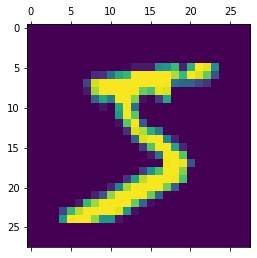

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train=X_train/255
X_test=X_test/255   #feature scaling


In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0] #single dimensional array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#to create the neural net
model=keras.Sequential([
                  keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
                  ])  #10 here is th enumber of output neurons and 784 is input neurons no.

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)                   #accuracy increased due to feature scaling


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7114 - accuracy: 0.8163
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3066 - accuracy: 0.9135
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2842 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9227
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2636 - accuracy: 0.9255


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2669 - accuracy: 0.9272


[0.2669075131416321, 0.9272000193595886]

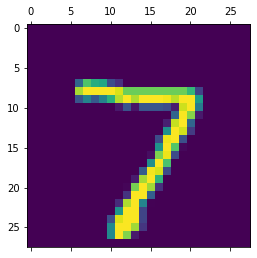

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted=model.predict(X_test_flattened)

In [ ]:
y_predicted[0]  #gives score for all 10 output neurons

array([2.5471121e-02, 3.3332708e-07, 4.9100816e-02, 9.5851743e-01,
       2.0765364e-03, 1.0775858e-01, 1.4053187e-06, 9.9977350e-01,
       8.8603288e-02, 6.4815295e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])  #gives max value in an array

7

In [ ]:
#to get the predicted values as a single digit ans instead of getting a whole array
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[0:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    4,    3,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   7,    9,  923,   19,    7,    4,   11,   11,   38,    3],
       [   2,    0,   17,  925,    0,   23,    2,   12,   23,    6],
       [   2,    1,    4,    1,  916,    0,   10,    4,   11,   33],
       [   8,    3,    3,   36,    8,  776,   11,    6,   34,    7],
       [  15,    3,    5,    1,    7,   12,  910,    2,    3,    0],
       [   1,    6,   22,    8,    6,    0,    0,  952,    6,   27],
       [   7,    9,    6,   19,    9,   22,    9,   10,  877,    6],
       [  11,    7,    1,   10,   26,    7,    0,   26,    8,  913]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

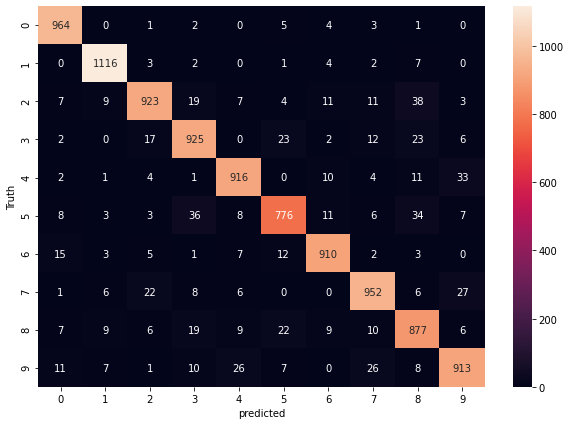

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
#Adding hidden layer to model
model=keras.Sequential([
                  keras.layers.Dense(100,input_shape=(784,),activation='relu'), #100 here is no of neurons in hidden layer
                  keras.layers.Dense(10,activation='sigmoid')
                  ])  

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4568 - accuracy: 0.8729
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1298 - accuracy: 0.9615
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0903 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0673 - accuracy: 0.9788
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0486 - accuracy: 0.9854


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9769


[0.07513926178216934, 0.9768999814987183]

In [ ]:
#in case we dont want to flatten the 2nd degree array manually
model=keras.Sequential([
                  keras.layers.Flatten(input_shape=(28,28)),
                  keras.layers.Dense(100,activation='relu'), #100 here is no of neurons in hidden layer
                  keras.layers.Dense(10,activation='sigmoid')
                  ])  

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4452 - accuracy: 0.8722
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1233 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0855 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0613 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0463 - accuracy: 0.9868


In [ ]:
#playing around with optimization values
model=keras.Sequential([
                  keras.layers.Flatten(input_shape=(28,28)),
                  keras.layers.Dense(100,activation='relu'),
                  keras.layers.Dense(500,activation='relu'),
                  keras.layers.Dense(10,activation='sigmoid')
                  ])  

model.compile(
    optimizer='adamax',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5143 - accuracy: 0.8601
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1709 - accuracy: 0.9508
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1141 - accuracy: 0.9660
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0912 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0733 - accuracy: 0.9780
